
# Task 2 – Logic and Circuits (Home Alarm System)

**System chosen:** Home Alarm System

**Inputs:**
- D = Door sensor (1 = door open)
- W = Window sensor (1 = window open)
- A = Away mode (1 = active)
- O = Override (1 = disable alarm)

**Output:** Alarm

**Behavior:** The alarm sounds when the system is in *Away* mode and either the door or a window is open, unless an override is active.

**Boolean equation:**

$$
\text{Alarm} = A \cdot (D + W) \cdot \overline{O}
$$

This notebook combines explanatory markdown with runnable Python cells for the truth table and image display.


In [ ]:

# Generate the truth table for the Home Alarm system
import pandas as pd
import itertools

cols = ['D','W','A','O']
rows = []
for vals in itertools.product([0,1], repeat=4):
    D,W,A,O = vals
    Alarm = int(A and (D or W) and (not O))
    rows.append(dict(zip(cols, vals), **{'Alarm':Alarm}))

df = pd.DataFrame(rows)
df = df[cols + ['Alarm']]
df


,D,W,A,O,Alarm
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,0
4,0,1,0,0,0
5,0,1,0,1,0
6,0,1,1,0,1
7,0,1,1,1,0
8,1,0,0,0,0
9,1,0,0,1,0


### Circuit Diagram

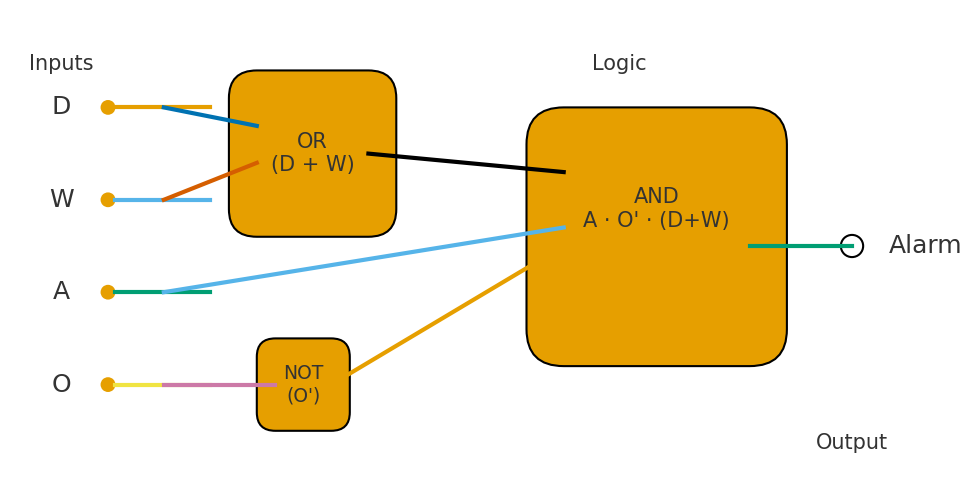

In [ ]:

# Display  circuit image (make sure the image file exists in the same directory)
from IPython.display import Image, display
import os
img_path = "home_alarm_circuit.png"
if os.path.exists(img_path):
    display(Image(img_path, width=700))
else:
    print("Image not found. Make sure 'home_alarm_circuit.png' is in the notebook directory.")



## Optional: Simulator (CircuitVerse) — Import file included

I've included a CircuitVerse export file: **`HomeAlarmSystem.cv`** in the same folder.


**Testing:** Toggle inputs to verify behavior. When A=1 and O=0, Alarm should be 1 if D=1 or W=1.

After running the simulation, a screenshot was taken and saved as `circuitverse_home_alarm.png`, then placed in this notebook.


In [1]:
import json

with open("HomeAlarmSystem.cv") as f:
    data = json.load(f)

main_scope = data["scopes"][0]

components_count = sum(
    len(main_scope.get(k, [])) 
    for k in ["Input", "Output", "NotGate", "OrGate", "AndGate"]
)

print(f"Project name: {data.get('name', 'Unnamed')}")
print(f"Total components: {components_count}")
print(f"Inputs: {len(main_scope.get('Input', []))}")
print(f"Outputs: {len(main_scope.get('Output', []))}")
print(f"AND gates: {len(main_scope.get('AndGate', []))}")
print(f"OR gates: {len(main_scope.get('OrGate', []))}")
print(f"NOT gates: {len(main_scope.get('NotGate', []))}")


Project name: HomeAlarmSystem
Total components: 8
Inputs: 4
Outputs: 1
AND gates: 1
OR gates: 1
NOT gates: 1


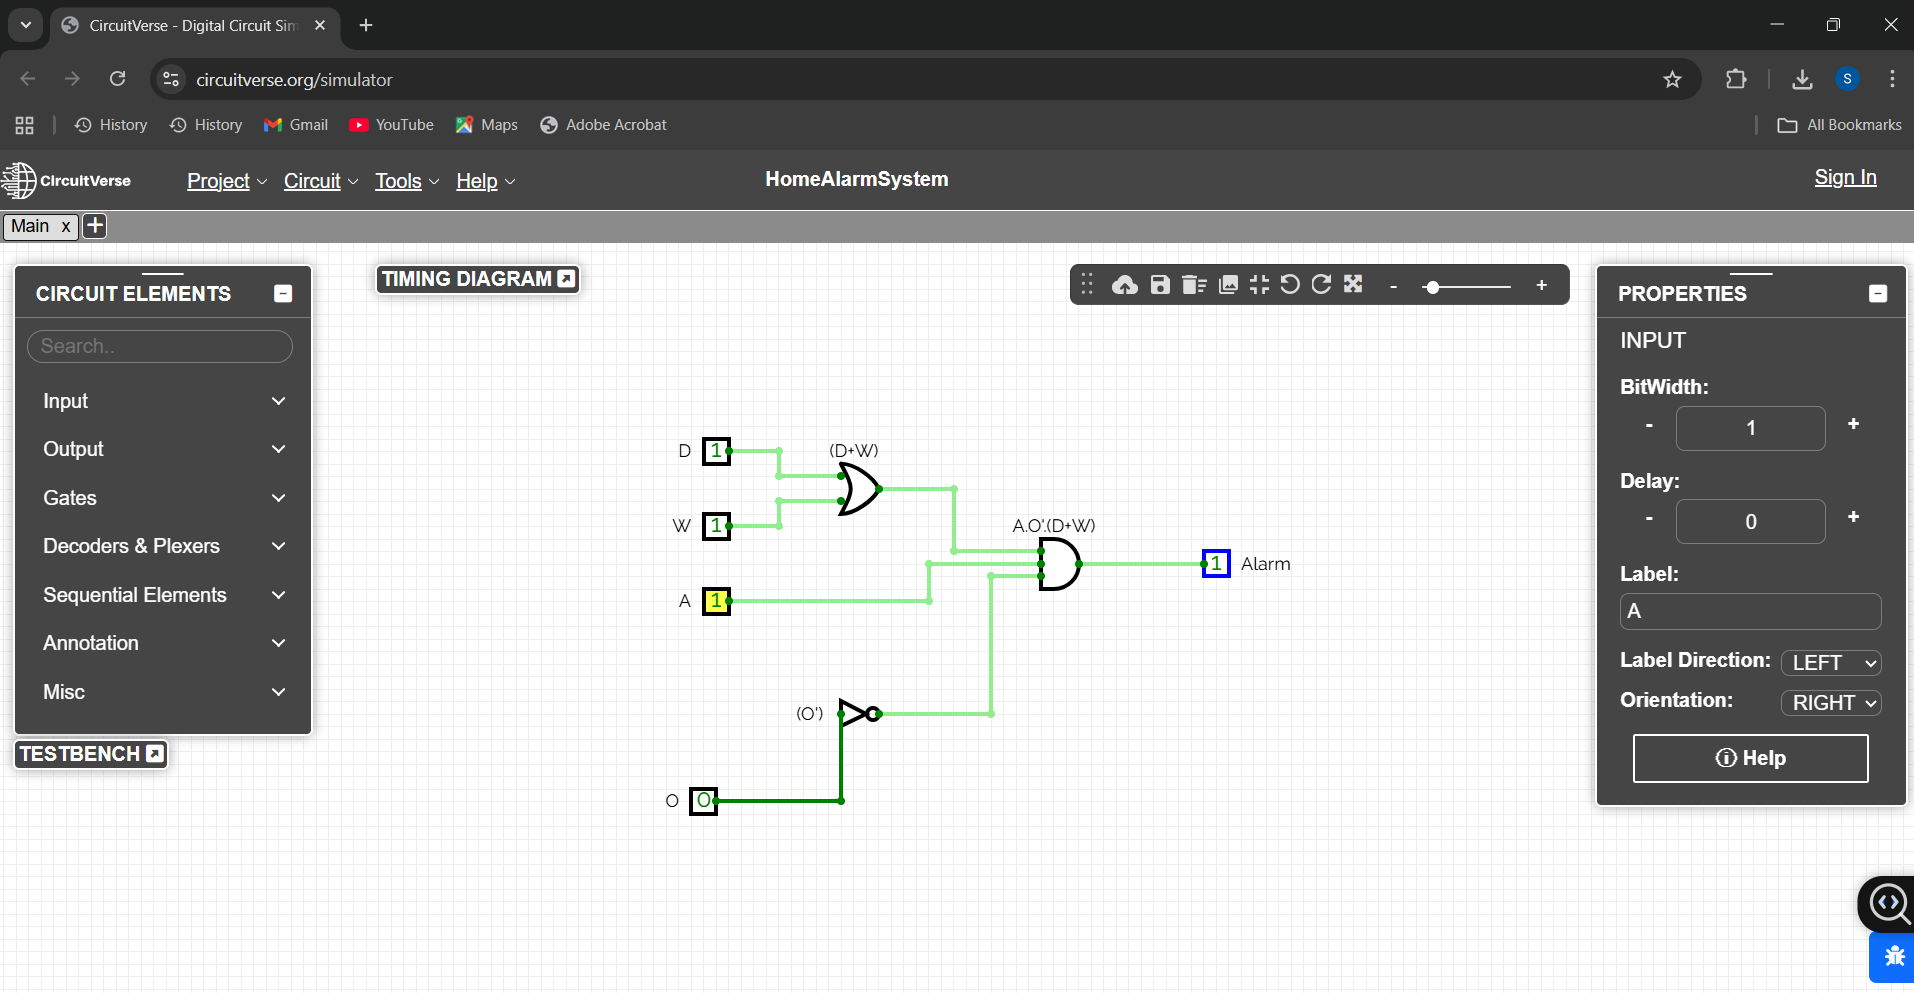

In [2]:

# Display user's CircuitVerse screenshot if present
from IPython.display import Image, display
import os
img_path = "circuitverse_home_alarm.png"
if os.path.exists(img_path):
    display(Image(img_path, width=800))
else:
    print("Simulator screenshot not found. After you run the circuit in CircuitVerse, save a screenshot as 'circuitverse_home_alarm.png' in this folder to display it here.")



## Reflection

1. **Practical limits of purely logical systems:** Pure combinational logic is deterministic and fast but struggles with noisy inputs, timing issues, and tasks that require learning or probabilistic inference. Real systems often require state (memory), filtering, or machine-learning components.


2. **How machine reasoning differs from human reasoning:** Machine reasoning is strict, repeatable, and often statistical; human reasoning uses intuition, context, and analogies. Machines excel at scale and speed; humans excel at flexible abstraction and dealing with ambiguity.


---

**Files included:**
- `task2.ipynb` (this notebook)
- `home_alarm_circuit.png` (diagram image)
- `HomeAlarmSystem.cv.` (CircuitVerse import file)

